In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json

In [17]:
agents = ["AlwaysDefect","AlwaysCooperate","TitforTat","NotTitforTat"]

In [33]:
import glob

files = glob.glob('data*.csv')
# files.remove('data.csv')
frame = pd.DataFrame()
list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

In [34]:
df.iloc[0]['agent1'].split(',')

['[0.25',
 ' 0.45318104497601325',
 ' 0.6698456655165717',
 ' 0.9052071975132759',
 ' 0.9680762049802472',
 ' 0.9886072444480796',
 ' 0.9959727564667373',
 ' 0.9985895611401714',
 ' 0.9995092906954416',
 ' 0.9998301257393266',
 ' 0.999941422441706',
 ' 0.9999798647641341',
 ' 0.9999930969928632',
 ' 0.9999976386815431',
 ' 0.9999991937951374',
 ' 0.999999725196092',
 ' 0.9999999064641517',
 ' 0.9999999682030173',
 ' 0.99999998920286',
 ' 0.9999999963373202',
 ' 0.9999999987586305',
 ' 0.9999999995796094',
 ' 0.9999999998577385',
 ' 0.9999999999518904',
 ' 0.9999999999837402',
 ' 0.9999999999945076',
 ' 0.9999999999981458',
 ' 0.9999999999993743',
 ' 0.999999999999789',
 ' 0.9999999999999288',
 ' 0.999999999999976',
 ' 0.9999999999999918',
 ' 0.9999999999999972',
 ' 0.9999999999999992',
 ' 0.9999999999999996',
 ' 0.9999999999999999',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 ' 1.0',
 '

In [14]:
df.head()

,agent1,agent2,agent3,agent4,dynamics,game,gamma,generations_until_stability,initial_distribution
0,"[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",replicator,Prisoner's Dilemma,0.95,100,"[0.25, 0.25, 0.25, 0.25]"
1,"[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",replicator,Prisoner's Dilemma,0.95,100,"[0.4, 0.4, 0.1, 0.1]"
2,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...",replicator,Prisoner's Dilemma,0.95,100,"[0.1, 0.1, 0.4, 0.4]"
3,"[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",replicator,Prisoner's Dilemma,0.95,100,"[0.4, 0.1, 0.4, 0.1]"
4,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...",replicator,Prisoner's Dilemma,0.95,100,"[0.1, 0.4, 0.1, 0.4]"


## Use these graphs to find which combinations are 'interesting'

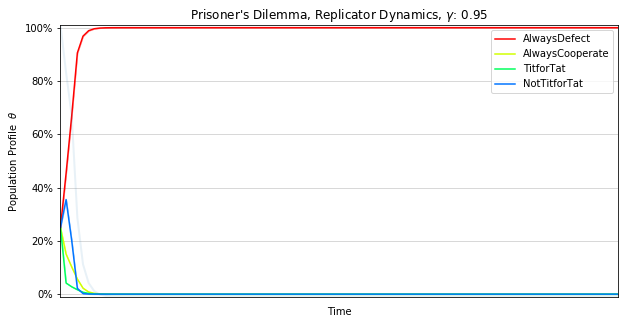

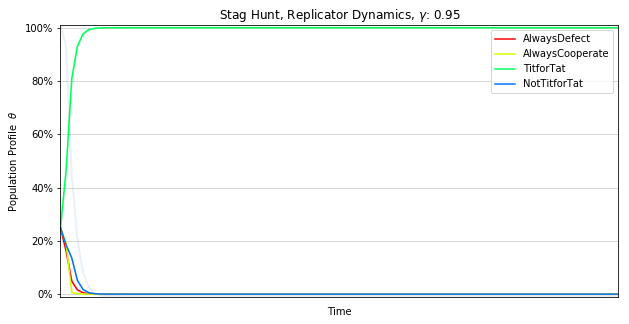

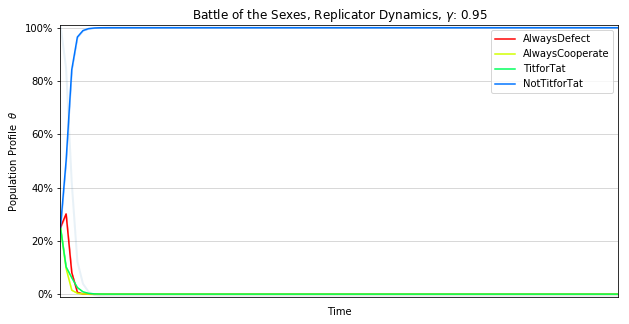

Prisoner's Dilemma & Replicator & $0.95$ & $100$ & $0.04$\\
Stag Hunt & Replicator & $0.95$ & $100$ & $0.04$\\
Battle of the Sexes & Replicator & $0.95$ & $100$ & $0.03$\\


In [35]:
import seaborn

plt.rcParams["figure.figsize"] = (10,5)
table = []

def handle(df, M):
    xs = range(M.shape[2])
    ys = M.mean(0)
    stds = M.std(0) #+ 0.1 * np.random.randn(M.shape[1], M.shape[2])
    cmap = plt.cm.get_cmap('hsv', 6)
    
    int_entropy = -np.sum(ys * np.log(ys + 0.00001), axis=0)
    
#     if df.iloc[0]["dynamics"] == 'replicator':
#         return
        
    for i in range(4):
        plt.grid(True, 'major', 'y', ls='-', lw=.5, c='k', alpha=.3)
        plt.plot(xs, ys[i], label=agents[i], color=cmap(i), linewidth=1.5)
        plt.fill_between(xs, ys[i]-2 * stds[i], ys[i]+2 * stds[i], alpha=0.10, facecolor='red', color=cmap(i))
        plt.fill_between(xs, ys[i]-stds[i], ys[i]+stds[i], alpha=0.15, facecolor='red', color=cmap(i))
    plt.title("{}, {} Dynamics, $\\gamma$: {}".format(df.iloc[0]["game"], df.iloc[0]["dynamics"].capitalize(), df.iloc[0]["gamma"]))
    plt.ylabel('Population Profile  $\\theta$')
    plt.xlabel('Time', labelpad=10)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    plt.legend()
    plt.ylim((-.01,1.01))
    plt.xlim(0, xs[-1])
    
    plt.twinx()
    plt.gca().set_yticks([])
    plt.plot(int_entropy, alpha=.10, linewidth=2, label='entropy')
    plt.ylim(int_entropy.min(), int_entropy.max())
    plt.show()
    
    table.append('{} & {} & ${}$ & ${}$ & ${:.2f}$\\\\'.format(df.iloc[0]["game"], 
                                              df.iloc[0]["dynamics"].capitalize(),
                                              df.iloc[0]["gamma"],
                                              df.iloc[0]["generations_until_stability"], 
                                              np.mean(int_entropy)))

sims = []
for dynamics in df['dynamics'].unique():
    for gamma in df['gamma'].unique():
        for game in df['game'].unique():
            for distro in df['initial_distribution'].unique():
                subset = df[(df['dynamics'] == dynamics) & (df['gamma'] == gamma) & (df['game'] == game) & (df['initial_distribution'] == distro)]

                data = []
                for i, r in subset.iterrows():
                    plays1 = np.array(json.loads(df.iloc[i]['agent1']))
                    plays2 = np.array(json.loads(df.iloc[i]['agent2']))
                    plays3 = np.array(json.loads(df.iloc[i]['agent3']))
                    plays4 = np.array(json.loads(df.iloc[i]['agent4']))
                    M = np.vstack([plays1, plays2, plays3, plays4])
                    data.append(M)

                M = np.array(data)
                
                handle(subset, M)
                
len(table)
print('\n'.join(table))

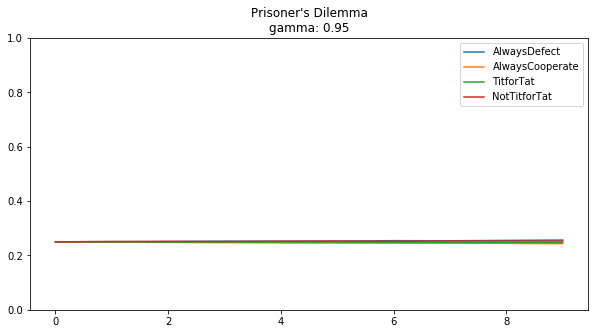

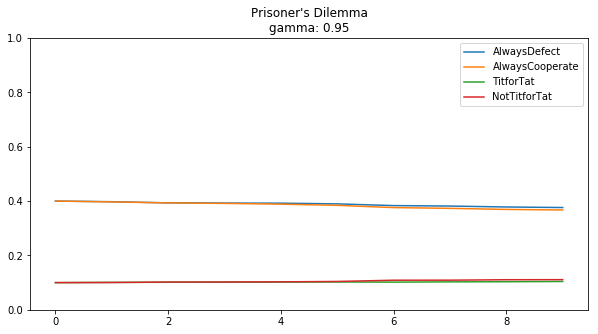

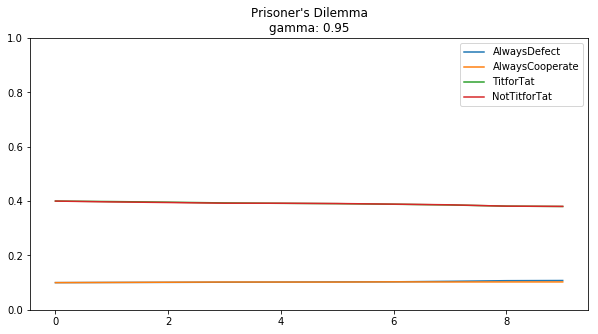

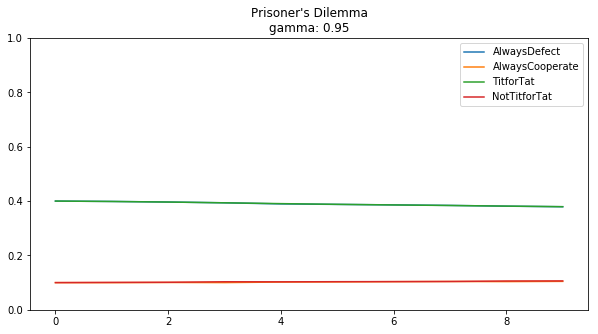

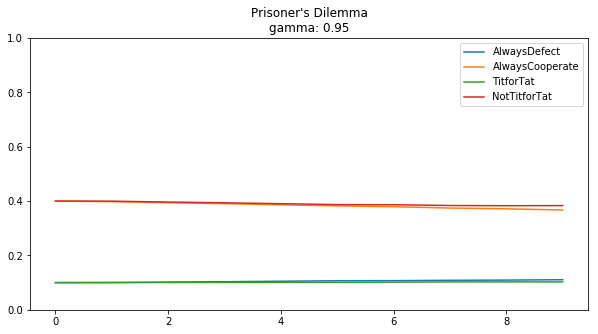

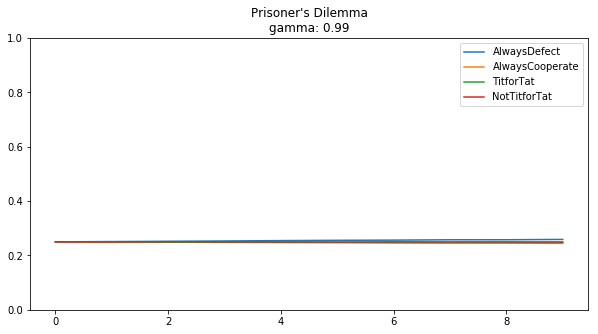

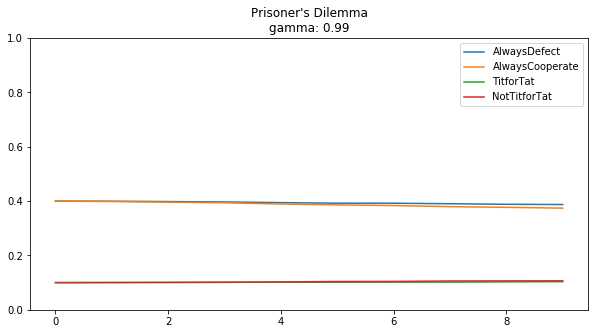

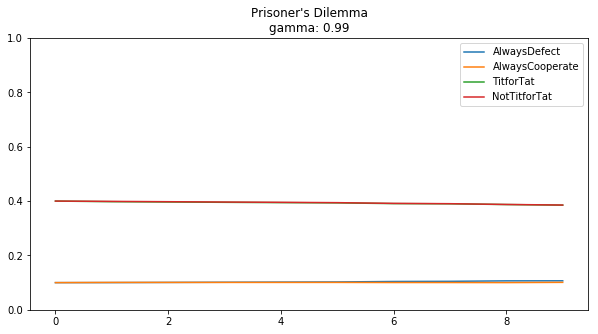

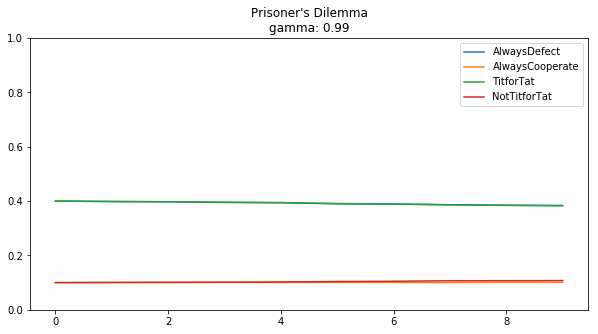

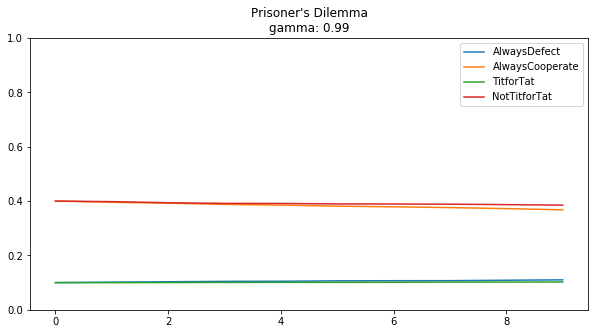

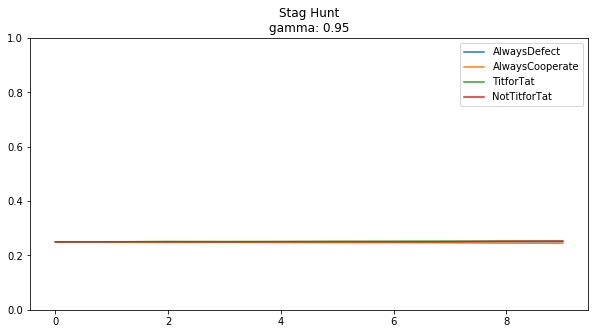

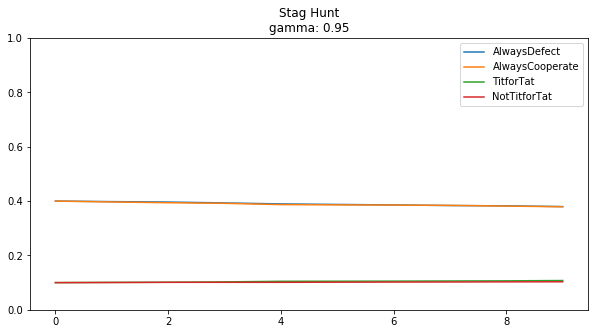

In [7]:
for i in range(12):
    plays1 = np.array(json.loads(df.iloc[i]['agent1']))
    plays2 = np.array(json.loads(df.iloc[i]['agent2']))
    plays3 = np.array(json.loads(df.iloc[i]['agent3']))
    plays4 = np.array(json.loads(df.iloc[i]['agent4']))
    plt.plot(plays1, label=agents[0])
    plt.plot(plays2, label=agents[1])
    plt.plot(plays3, label=agents[2])
    plt.plot(plays4, label=agents[3])
    plt.title("{}\ngamma: {}".format(df.iloc[i]["game"], df.iloc[i]["gamma"]))
    plt.legend()
    plt.ylim((0,1))
    plt.show()

df['agent1_cat'] = df.agent1.astype("category").cat.codes
df['agent2_cat'] = df.agent2.astype("category").cat.codes
df['game_cat'] = df['agent1_cat'] + df['agent2_cat']

df.head()

y = df['win']
X = df[['game_cat', 'n_plays']]

mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 